In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = cifar10.load_data()

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"y_train_orig shape: {y_train_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")
print(f"y_test_orig shape: {y_test_orig.shape}")

X_train_orig shape: (50000, 32, 32, 3)
y_train_orig shape: (50000, 1)
X_test_orig shape: (10000, 32, 32, 3)
y_test_orig shape: (10000, 1)


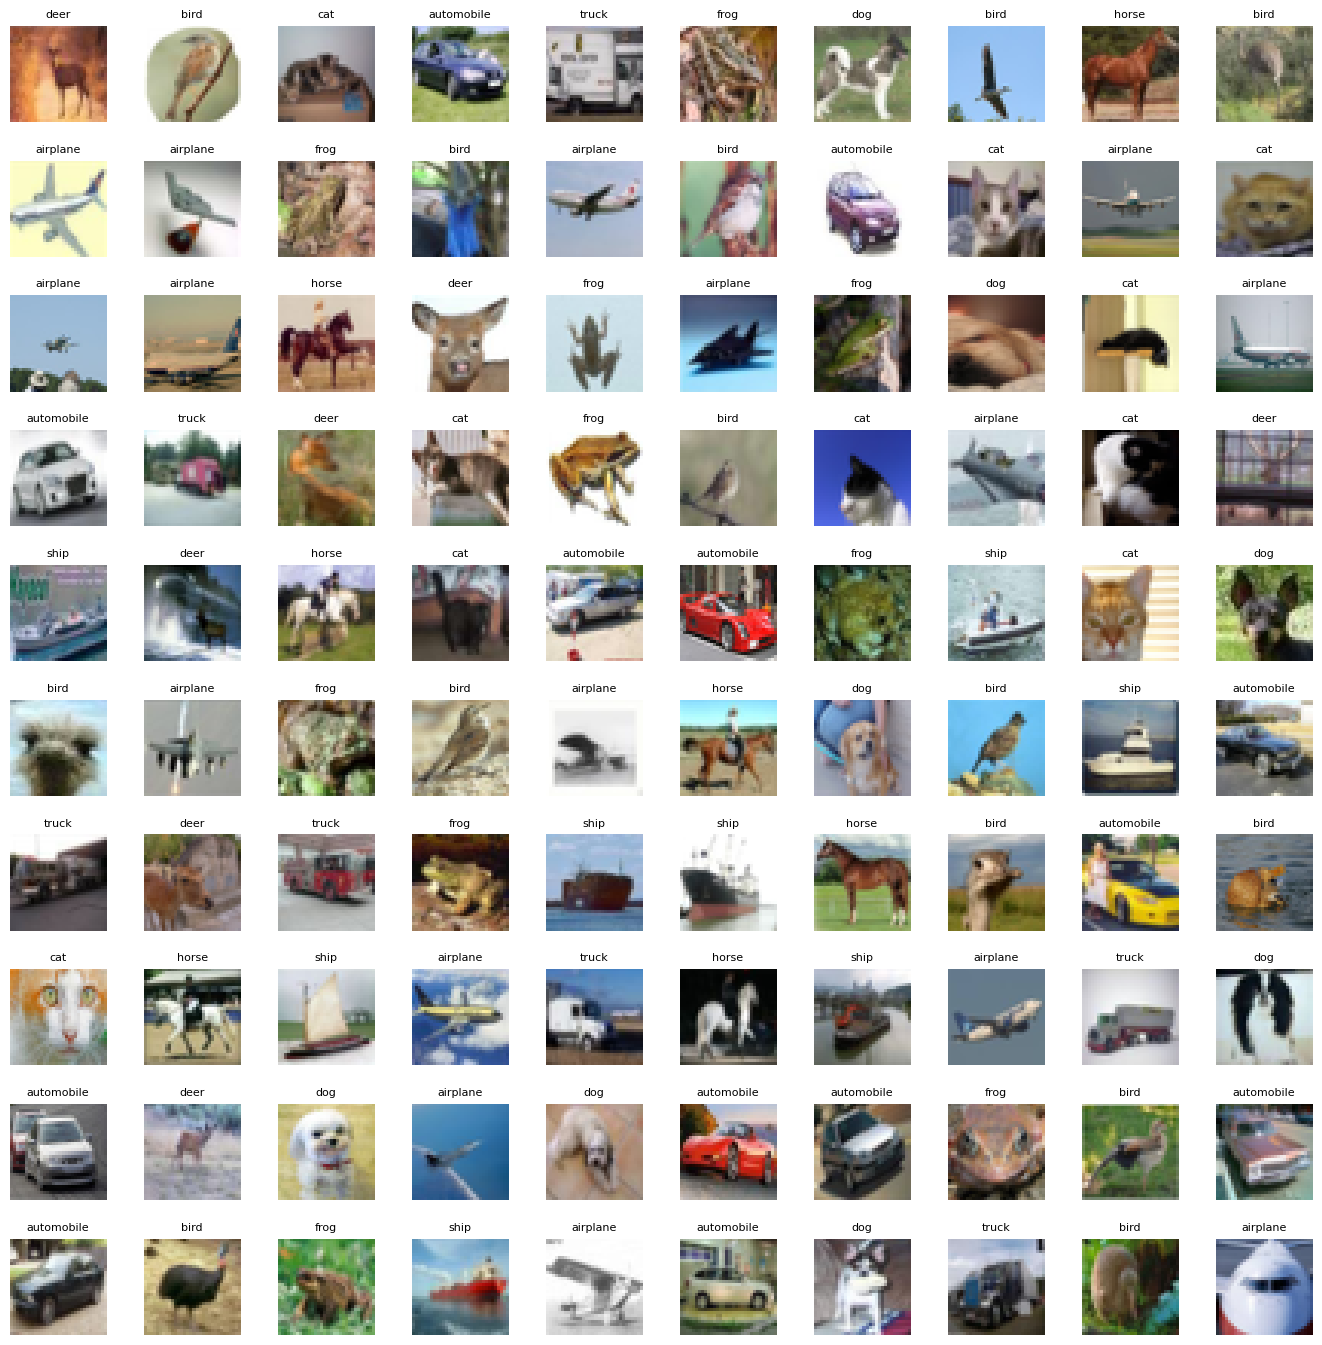

In [34]:
# Define the labels of the dataset
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize more images in a grid format
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel() 

n_train = len(X_train_orig)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train_orig[index])
    label_index = int(y_train_orig[index])
    axes[i].set_title(categories[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


Text(0.5, 1.0, 'Class distribution in training set')

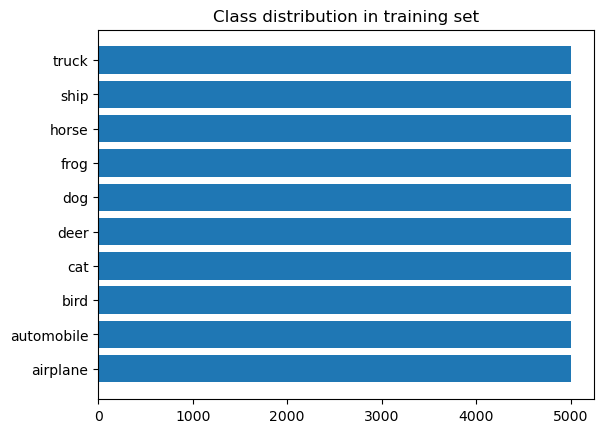

In [35]:
# Display class distribution
train_classes, train_counts = np.unique(y_train_orig, return_counts=True)
plt.barh(categories, train_counts)
plt.title('Class distribution in training set')


Text(0.5, 1.0, 'Class distribution in testing set')

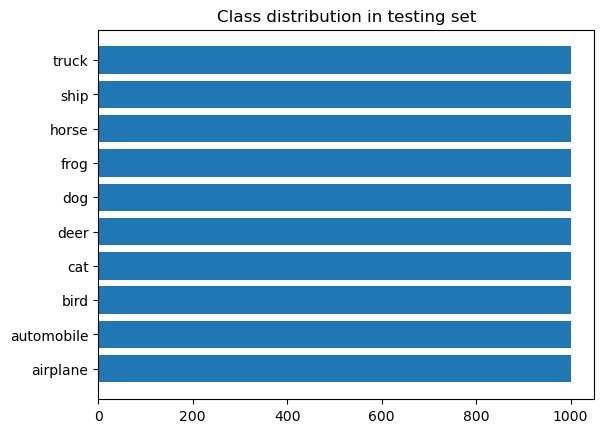

In [36]:
test_classes, test_counts = np.unique(y_test_orig, return_counts=True)
plt.barh(categories, test_counts)
plt.title('Class distribution in testing set')

In [37]:
# Scale the data
X_train = X_train_orig / 255.0
X_test = X_test_orig / 255.0

# Transform target variable into one-hot encoding
y_train = to_categorical(y_train_orig, 10)
y_test = to_categorical(y_test_orig, 10)

# Define model parameters
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

In [38]:
# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [39]:
# Compile the model
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [40]:

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [41]:
# Data augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

# Train the model
r = model.fit(train_generator, 
              epochs=20,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/20


2024-05-15 09:47:25.609730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1562/1562 [==============================] - 106s 67ms/step - loss: 1.6382 - accuracy: 0.4043 - precision: 0.6272 - recall: 0.1918 - val_loss: 1.2022 - val_accuracy: 0.5710 - val_precision: 0.7228 - val_recall: 0.4333
Epoch 2/20
1562/1562 [==============================] - 103s 66ms/step - loss: 1.2217 - accuracy: 0.5679 - precision: 0.7354 - recall: 0.4035 - val_loss: 1.0393 - val_accuracy: 0.6394 - val_precision: 0.7379 - val_recall: 0.5384
Epoch 3/20
1562/1562 [==============================] - 104s 67ms/step - loss: 1.0390 - accuracy: 0.6386 - precision: 0.7725 - recall: 0.5076 - val_loss: 0.9327 - val_accuracy: 0.6704 - val_precision: 0.7917 - val_recall: 0.5564
Epoch 4/20
1562/1562 [==============================] - 104s 67ms/step - loss: 0.9292 - accuracy: 0.6816 - precision: 0.7976 - recall: 0.5698 - val_loss: 0.9844 - val_accuracy: 0.6714 - val_precision: 0.7490 - val_recall: 0.6003
Epoch 5/20
1562/1562 [==============================] - 195s 125ms/step - loss: 0.8574 - accura

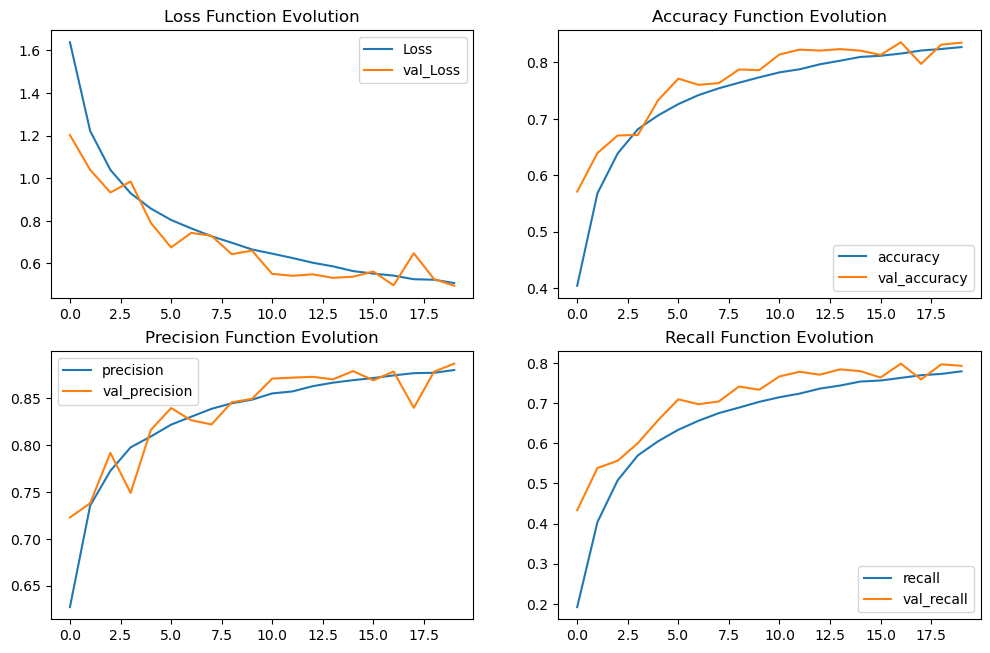

In [42]:
# Plot training history
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [43]:
# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')


313/313 [==============================] - 7s 22ms/step - loss: 0.4950 - accuracy: 0.8349 - precision: 0.8869 - recall: 0.7928
Test Accuracy : 83.49%


313/313 [==============================] - 7s 21ms/step


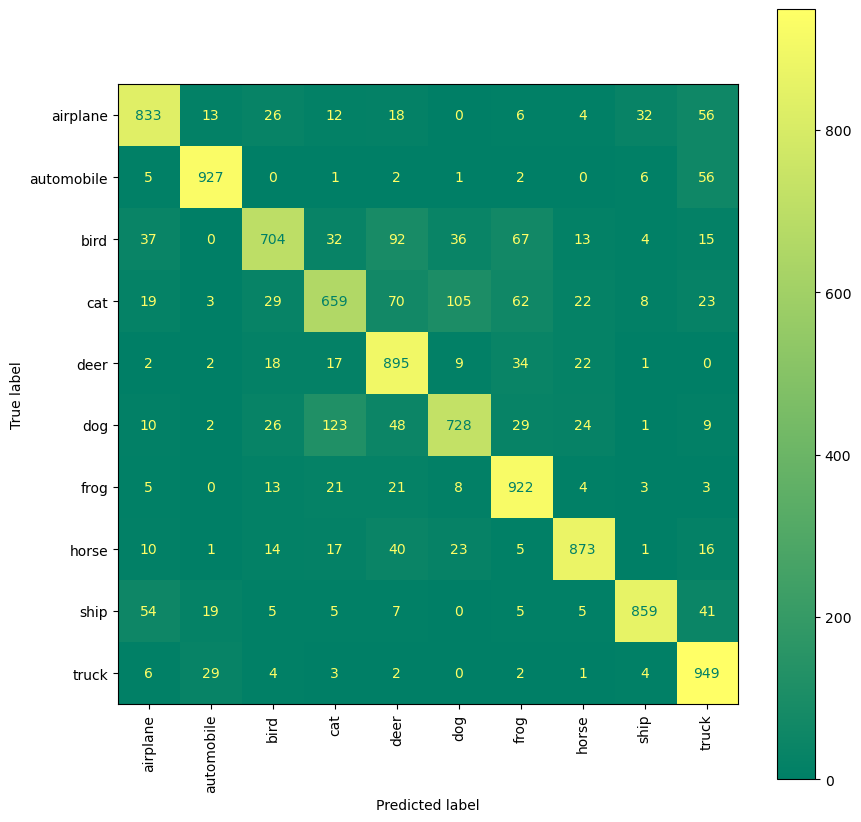

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.93      0.93      0.93      1000
           2       0.84      0.70      0.77      1000
           3       0.74      0.66      0.70      1000
           4       0.75      0.90      0.82      1000
           5       0.80      0.73      0.76      1000
           6       0.81      0.92      0.86      1000
           7       0.90      0.87      0.89      1000
           8       0.93      0.86      0.90      1000
           9       0.81      0.95      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [44]:
# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_orig, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

print(classification_report(y_test_orig, y_pred))

 Image 100 is [4]
1/1 [==============================] - 0s 113ms/step
The model predicts image 100 as bird


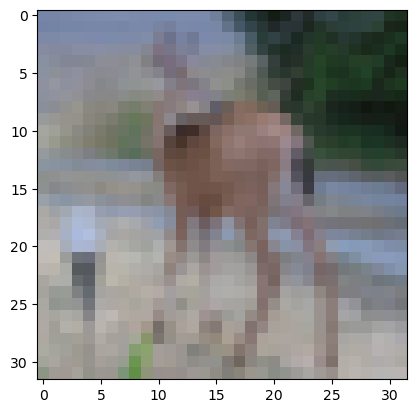

In [45]:
# Display a sample image
sample_image = X_test_orig[100]
plt.imshow(sample_image)
print(f" Image 100 is {y_test_orig[100]}")
pred_100 = np.argmax(model.predict(sample_image.reshape(1, 32, 32, 3)))
print(f"The model predicts image 100 as {categories[pred_100]}")

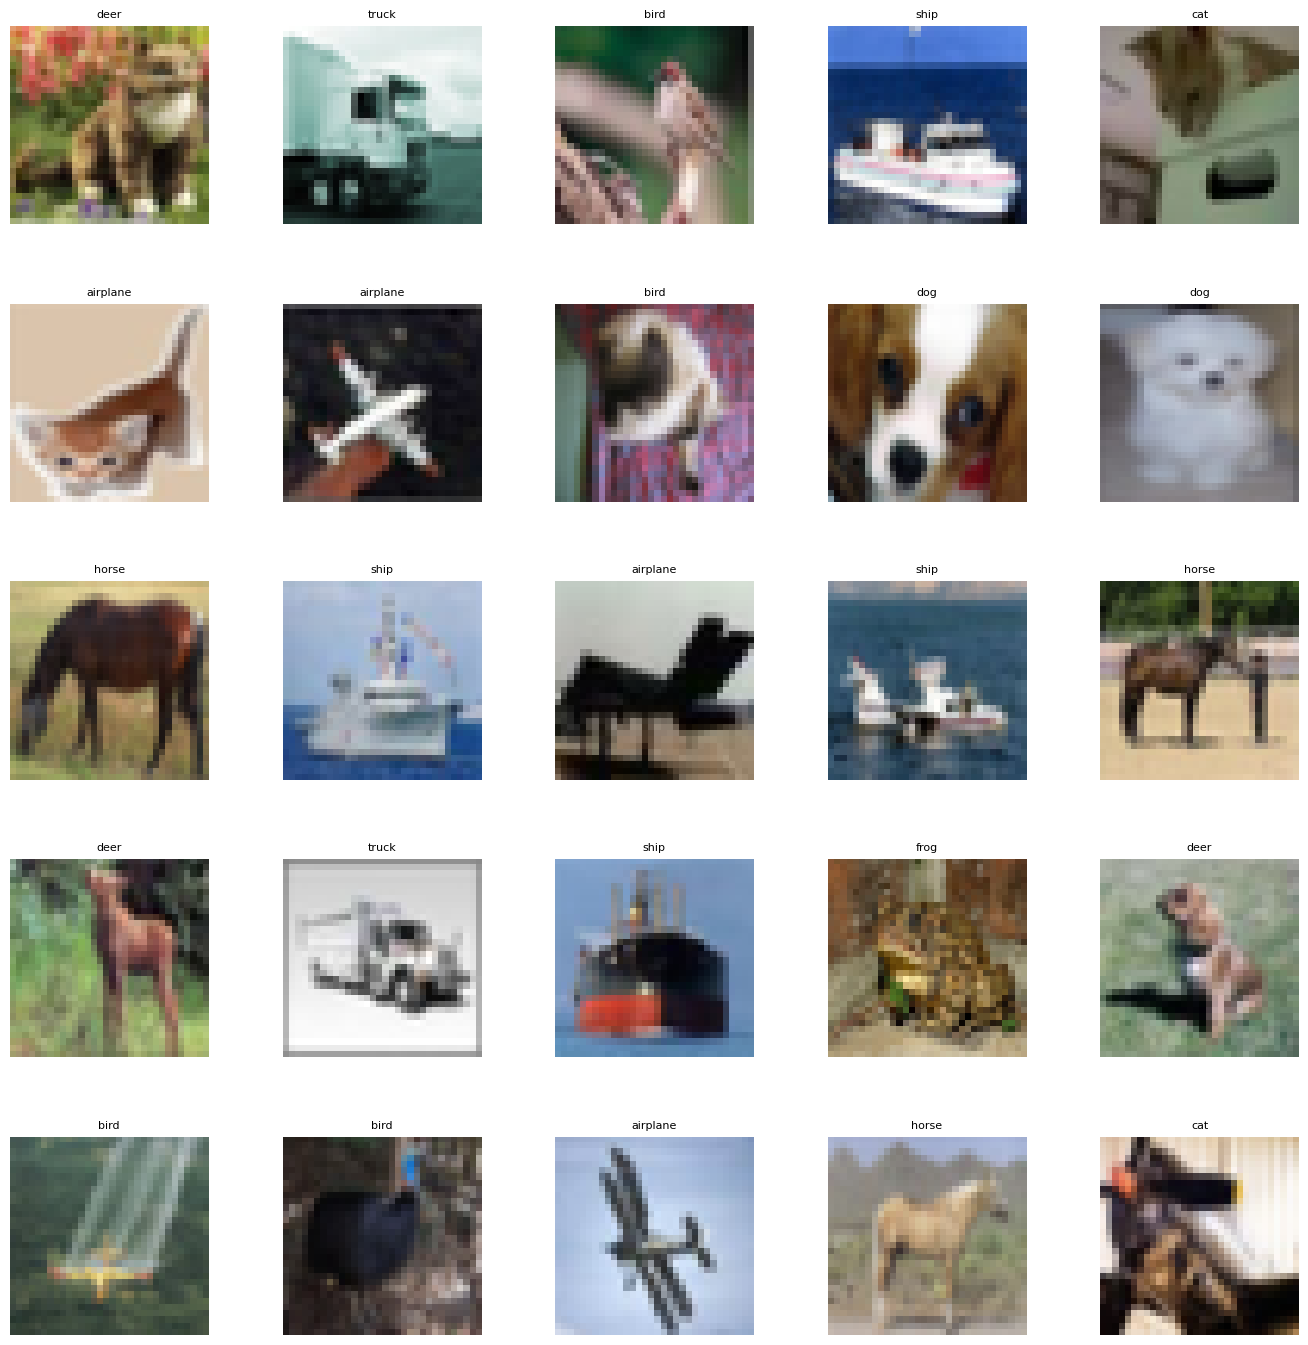

In [46]:
# Visualize more predicted images
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel() 

n_test = len(X_test_orig)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test_orig[index])
    label_index = int(y_pred[index])
    axes[i].set_title(categories[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)